In [1]:
from utils.FaceSketchDataset import FaceSketchDataset
from torch.utils.data import DataLoader
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
from models.unet import UNet
from models.diffusion import Diffusion
import torch
import tqdm.notebook as tqdm  
from torchvision.utils import save_image
from utils.Training_loop import TrainingLoop

In [2]:
load_dotenv()
DATA_PATH = os.getenv("ROOT_DATA_PATH")

In [3]:
dataset = FaceSketchDataset(root_dir=DATA_PATH, photo_folder='photos', sketch_folder='sketches')
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [4]:
for sketch, photo in dataloader:
    print("Sketch:", sketch.shape, "| Photo:", photo.shape)
    break

Sketch: torch.Size([16, 1, 256, 256]) | Photo: torch.Size([16, 3, 256, 256])


In [ ]:
for sketch_batch, photo_batch in dataloader:
    print("Sketch batch:", sketch_batch.shape)  # (Batch size, 1, 256, 256)
    print("Photo batch:", photo_batch.shape)      # (Batch size, 3, 256, 256)
    break

Sketch batch: torch.Size([16, 1, 256, 256])
Photo batch: torch.Size([16, 3, 256, 256])


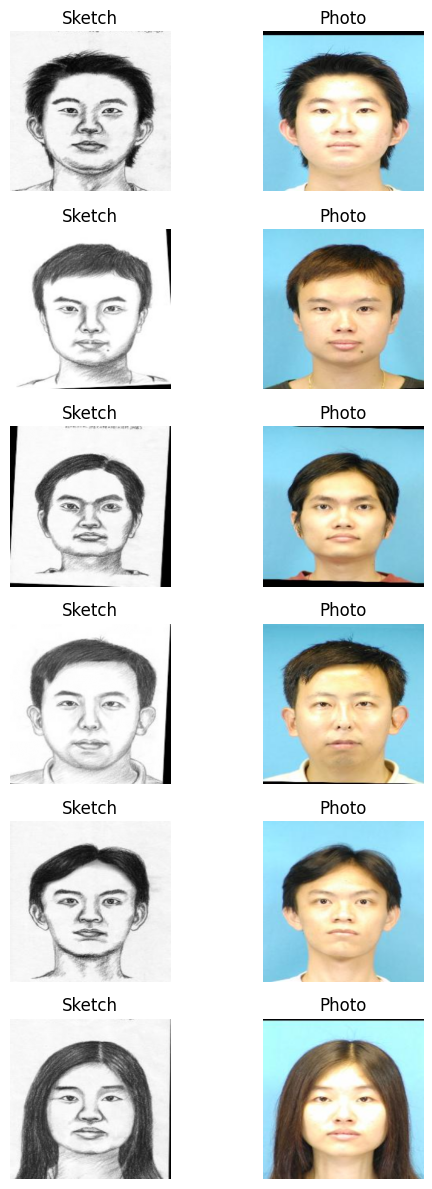

In [6]:
from utils.visualization import show_sketch_photo_batch
show_sketch_photo_batch(sketch_batch, photo_batch)

In [7]:
print("Sketch min/max:", sketch_batch.min().item(), sketch_batch.max().item())
print("Photo min/max:", photo_batch.min().item(), photo_batch.max().item())

Sketch min/max: 0.0 1.0
Photo min/max: 0.0 1.0


Model use

In [8]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
# Instantiate the model (4 channels in, 3 channels out), diffusion process, and optimizer
model = UNet(n_channels=4, n_classes=3).to(device)
diffusion = Diffusion(timesteps=1000, device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [10]:
trainer = TrainingLoop(model=model, diffusion=diffusion, dataloader=dataloader, optimizer=optimizer, device=device, epochs=5)

In [11]:
trainer.train()

Epoch [1/5], Loss: 1.0532


Epoch [2/5], Loss: 1.0025


Epoch [3/5], Loss: 0.9788


Epoch [4/5], Loss: 0.9699


Epoch [5/5], Loss: 0.9236
